# Group 17

# Crash Data Report

###  Name of students:
Yuval Moshe Lishaor<br>
Ori Bachar<br>

# <div style="text-align: center; font-size: 24px; font-weight: bold; color: #800000;">Crash Data Report in Tempe </div>


<img src="https://i.kinja-img.com/image/upload/c_fill,h_900,q_60,w_1600/479ff0950b32efe2417576d56243bf16.jpg" alt="Description of image" style="width: 100%; height: auto;">


In [707]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px #(שימוש למפה בלבד)


<b id="Top"> </b>  

1. [Interesting information for understanding the file](#1)
2. [Insight number one](#2)
3. [Insight number two](#3)
4. [Insight number three](#4)


<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

In [708]:
url = "https://raw.githubusercontent.com/oribachar13579/oriandyuval/main/1.08_Crash_Data_Report_(detail).csv"
strike_df = pd.read_csv(url)
strike_df.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


In [709]:
strike_df.shape

(51407, 35)

In [710]:
strike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51407 entries, 0 to 51406
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    51081 non-null  float64
 1   Y                    51081 non-null  float64
 2   OBJECTID             51407 non-null  int64  
 3   Incidentid           51407 non-null  int64  
 4   DateTime             51407 non-null  object 
 5   Year                 51407 non-null  int64  
 6   StreetName           51201 non-null  object 
 7   CrossStreet          50744 non-null  object 
 8   Distance             51406 non-null  float64
 9   JunctionRelation     51406 non-null  object 
 10  Totalinjuries        51406 non-null  float64
 11  Totalfatalities      51406 non-null  float64
 12  Injuryseverity       51406 non-null  object 
 13  Collisionmanner      51406 non-null  object 
 14  Lightcondition       51406 non-null  object 
 15  Weather              51406 non-null 

In [711]:
strike_df.columns

Index(['X', 'Y', 'OBJECTID', 'Incidentid', 'DateTime', 'Year', 'StreetName',
       'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries',
       'Totalfatalities', 'Injuryseverity', 'Collisionmanner',
       'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One',
       'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One',
       'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two',
       'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two',
       'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude',
       'Longitude'],
      dtype='object')

In [712]:
#החלפנו את שם העמודה לשם יותר ברור להבנה-מתאר מספור מהתאונה הראשונה עד האחרונה בקובץ זה
strike_df.rename(columns={'OBJECTID': 'NumOfAccident'}, inplace=True)

#החלפנו את איקס לקאורדינטת איקס על מנת שמיקום במפה ייראה ברור יותר, כנל ל וואי 
strike_df.rename(columns={'X': 'Coordinate_X'}, inplace=True)
strike_df.rename(columns={'Y': 'Coordinate_Y'}, inplace=True)

#הסרת שתי העמודות האחרונות כיוון שהן כמו שתי העמודות הראשונות
strike_df = strike_df.iloc[:, :-2]

In [713]:
#מציאת ערכים חסרים בכל עמודה
strike_df.isnull().sum()

Coordinate_X            326
Coordinate_Y            326
NumOfAccident             0
Incidentid                0
DateTime                  0
Year                      0
StreetName              206
CrossStreet             663
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 48
Gender_Drv1             954
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          48
AlcoholUse_Drv1          48
DrugUse_Drv1             48
Unittype_Two           3387
Age_Drv2               4753
Gender_Drv2            4855
Traveldirection_Two    3387
Unitaction_Two         3387
Violation1_Drv2        4753
AlcoholUse_Drv2        4753
DrugUse_Drv2           4753
dtype: int64

In [714]:
len(strike_df)

51407

In [715]:
strike_df["Year"].unique()


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024], dtype=int64)

In [716]:
strike_df.tail()

,Coordinate_X,Coordinate_Y,NumOfAccident,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2
51402,-111.926385,33.435558,51403,4155884,2024/03/14 13:15:00+00,2024,SR-202 Exit 7 T-Ramp,NaN,0.0,Not Junction Related,...,No Apparent Influence,No Apparent Influence,Driver,22.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence
51403,-111.926404,33.435576,51404,4155885,2024/03/14 13:20:00+00,2024,SR-202 Exit 7 T-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,No Apparent Influence,No Apparent Influence,Driver,25.0,Female,West,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence
51404,-111.909869,33.436621,51405,4155890,2024/03/15 07:11:00+00,2024,SR-202 Exit 8 J-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51405,-111.939524,33.386046,51406,4155893,2024/03/09 07:44:00+00,2024,US-60 Exit 173 J-Ramp,NaN,0.0,Entrance Exit Ramp 205,...,Alcohol,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51406,-111.968688,33.405953,51407,4156010,2024/03/08 19:59:00+00,2024,I-10 Exit 153 C2-Ramp,NaN,0.0,Not Junction Related,...,No Apparent Influence,No Apparent Influence,Driver,58.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence


# <b id="section_1">  </b> <b style='color:#F05454'>1.  Interesting information for understanding the file </b> <b></b> 
<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

* **We created a correlation table in order to help us distinguish whether there is a relationship between certain columns.**

[Text(0.5, 1.0, 'Correlation Matrix')]

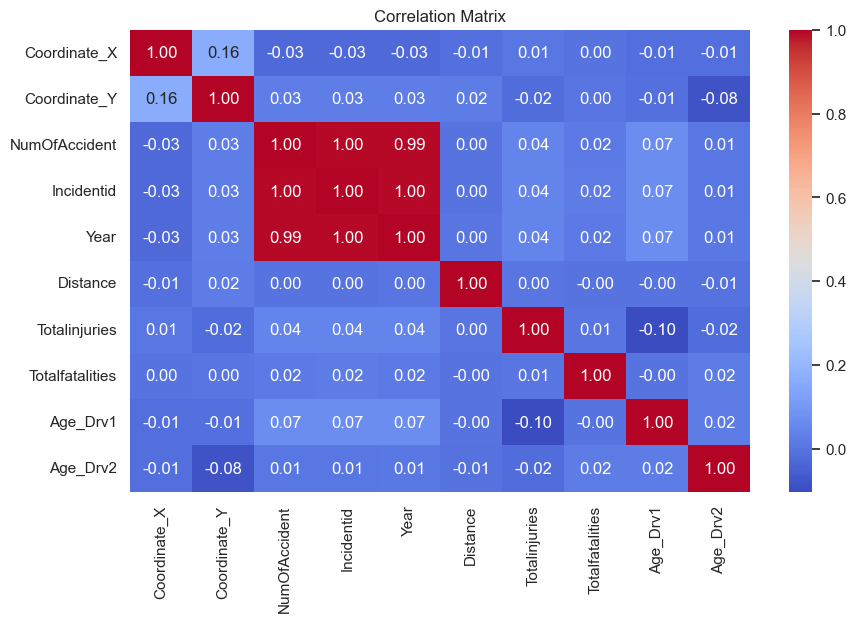

In [717]:
# בחירת העמודות המספריות בלבד
numeric_df = strike_df.select_dtypes(include=['float64', 'int64'])
# חישוב מטריצת הקורלציה
corr_matrix = numeric_df.corr()
#יצירת heatmap 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f").set(title='Correlation Matrix')


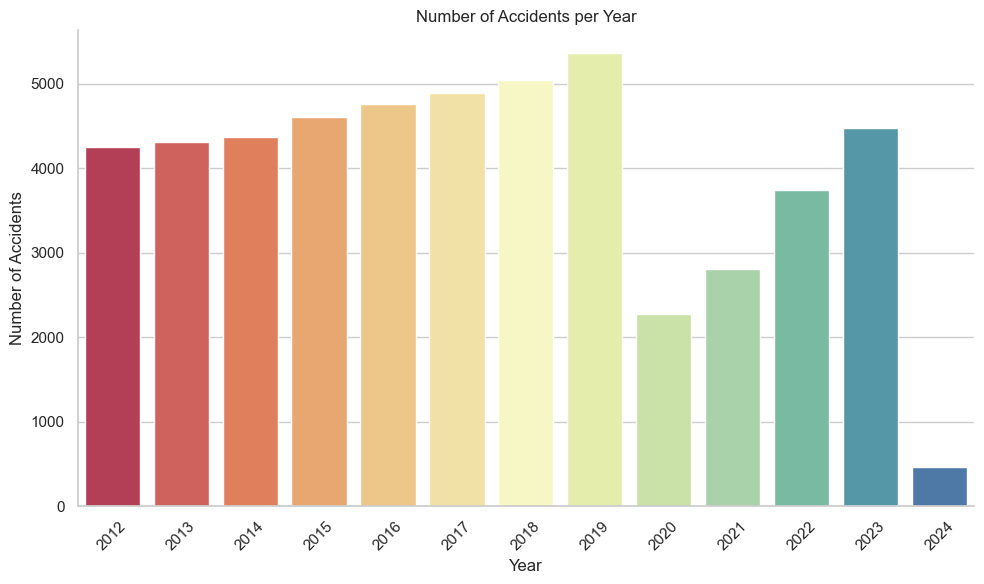

In [718]:
# יצירת נתוני תאונות לפי שנה
accidents_by_year = strike_df['Year'].value_counts().sort_index()

# DataFrame מתוך הנתונים יצירת
accidents_by_year_df = accidents_by_year.reset_index()
accidents_by_year_df.columns = ['Year', 'Number of Accidents']

# יצירת פלטת צבעים מותאמת אישית(נעזרנו בצ'אט גי טי פי)
custom_palette = sns.color_palette("Spectral", len(accidents_by_year_df))

# יצירת גרף barplot 
sns.set(style="whitegrid")
bar_plot = sns.barplot(x='Year', y='Number of Accidents', data=accidents_by_year_df, palette=custom_palette)
bar_plot.set_title('Number of Accidents per Year')
bar_plot.set_xlabel('Year')
bar_plot.set_ylabel('Number of Accidents')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)
sns.despine()

# שמירת הגרף
bar_plot.figure.tight_layout()
bar_plot.figure.savefig('accidents_per_year.png')


* **You can see the number of accidents that occurred each and every year. We hypothesize that in 2020 there was a significant decrease in the number of accidents due to the corona virus which caused that there will be fewer vehicles on the roads. In addition, in 2024 the data is based only until March 24, so there is not much amount of accidents.**

In [726]:
med_df= strike_df.groupby('Year')['NumOfAccident'].count()
med_df

Year
2012    4258
2013    4316
2014    4372
2015    4612
2016    4768
2017    4896
2018    5049
2019    5366
2020    2280
2021    2805
2022    3745
2023    4480
2024     460
Name: NumOfAccident, dtype: int64

In [727]:
# סכום מספר התאונות ב-16 הרחובות הכי גדולים
total_accidents_top_16 = accidents_by_street.head(16)['Number of Accidents'].sum()
# חישוב האחוזים(הורדנו 206 מסך כל הרחובות כיוון שחסרים לנו נתונים אודות 206 רחובות!
percentage_top_16 = (total_accidents_top_16 / (len(strike_df)-206)) * 100
# הדפסת התוצאה
print("Percentage of accidents in the top 16 streets:", percentage_top_16)


Percentage of accidents in the top 16 streets: 80.53944258901194


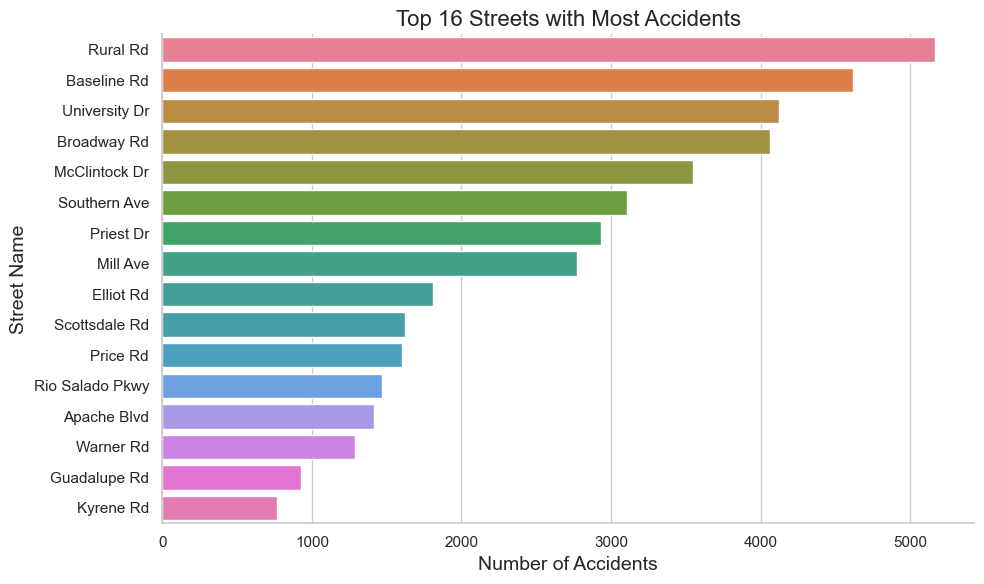

In [728]:
# חישוב מספר התאונות לכל רחוב
accidents_by_street = strike_df['StreetName'].value_counts().reset_index()
accidents_by_street.columns = ['StreetName', 'Number of Accidents']

# מציגים רק את 16 הרחובות עם מספר התאונות הגבוה ביותר
top_streets = accidents_by_street.head(16)
# יצירת גרף עמודות
sns.set(style="whitegrid")
bar_plot = sns.barplot(data=top_streets, x='Number of Accidents', y='StreetName', palette='husl', dodge=False)
bar_plot.set_title('Top 16 Streets with Most Accidents', fontsize=16)
bar_plot.set_xlabel('Number of Accidents', fontsize=14)
bar_plot.set_ylabel('Street Name', fontsize=14)
sns.despine()
# שמירת הגרף(נעזרנו בצאט גי טי פי)
fig = bar_plot.get_figure()
fig.tight_layout()
fig.savefig('top_streets_accidents.png')

In [729]:
total_accidents = top_streets['Number of Accidents'].sum()
print("Total number of accidents of those 16 top streets:", total_accidents)


Total number of accidents of those 16 top streets: 41237


In [730]:
#מתאר לנו כמה רחובות שונים יש בכל הקובץ
num_streets = len(accidents_by_street['StreetName'].unique())
print(num_streets)


522


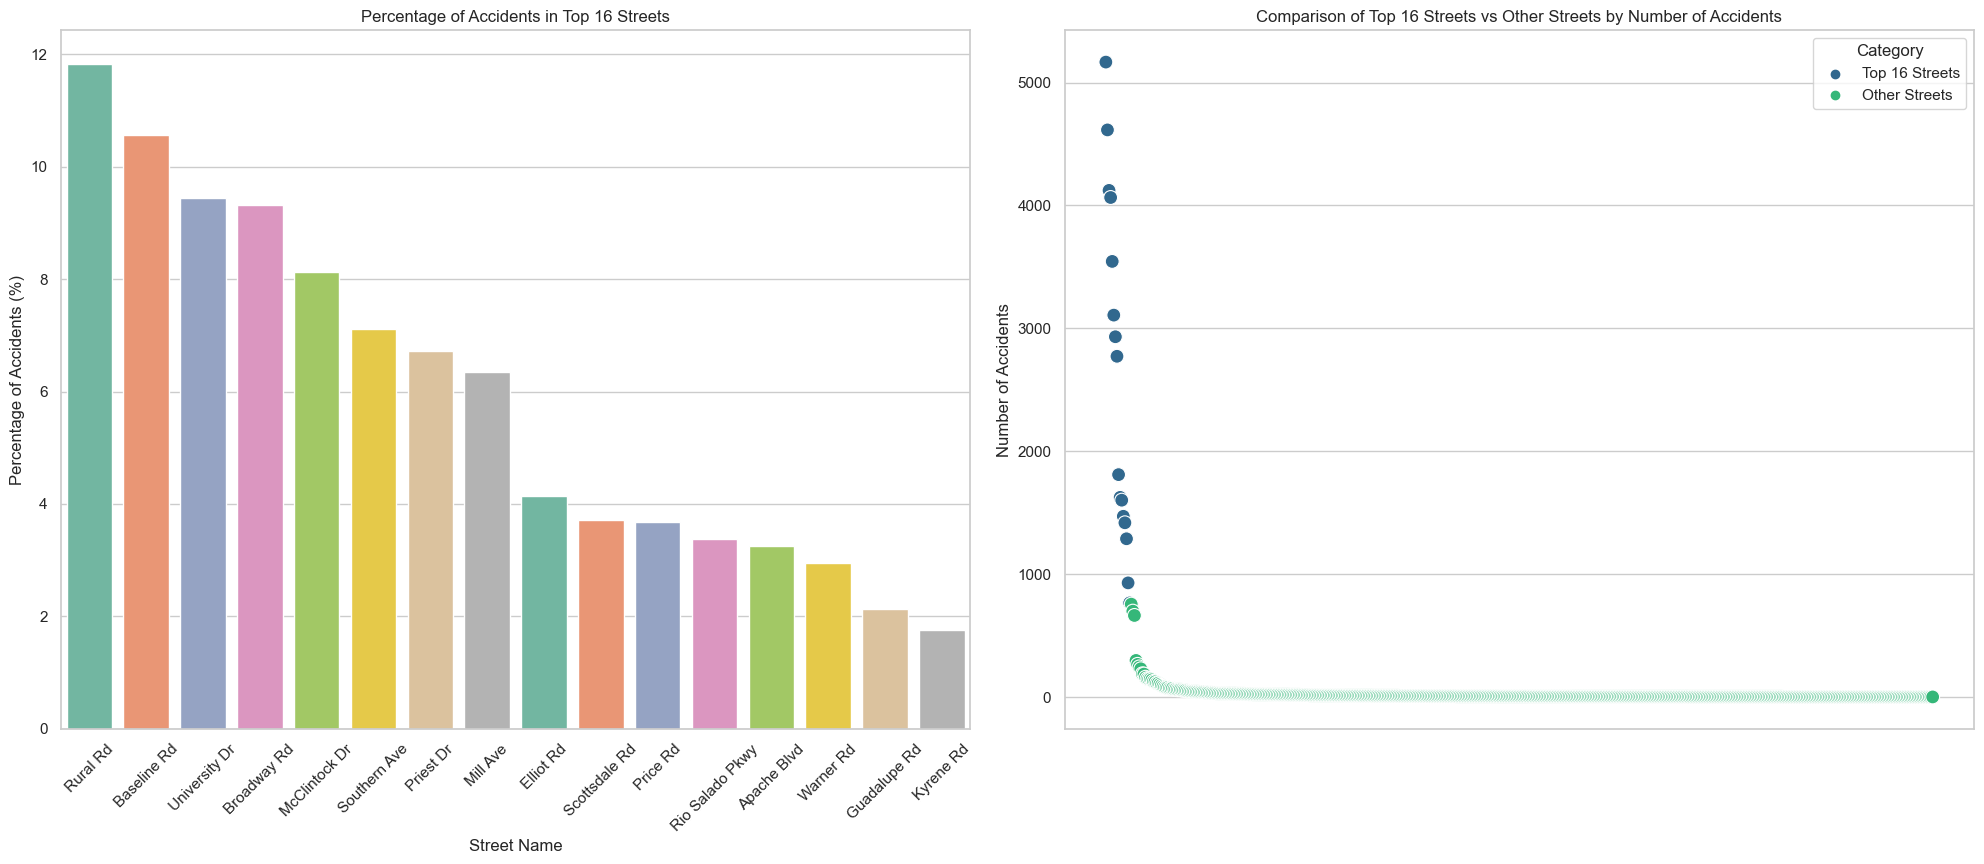

In [732]:
#מידות הגרפים(אורך ורוחב)
plt.figure(figsize=(20, 10))

#גרף barplot של 16 הרחובות עם הכי הרבה תאונות
plt.subplot(1, 2, 1)
sns.barplot(data=top_streets_with_percentage.head(16), x='StreetName', y='Percentage', palette='Set2')
plt.title('Percentage of Accidents in Top 16 Streets')
plt.xlabel('Street Name')
plt.ylabel('Percentage of Accidents (%)')
plt.xticks(rotation=45)

# גרף הscatterplot
plt.subplot(1, 2, 2)
sns.scatterplot(data=combined_streets, x='StreetName', y='Number of Accidents', hue='Category', palette='viridis', s=100)
plt.xlabel('Street Name')
plt.ylabel('Number of Accidents')
plt.title('Comparison of Top 16 Streets vs Other Streets by Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Category', loc='upper right')
plt.tight_layout()

#הסרנו את שמות הרחובות בציר איקס כיוון שיש המון ואין לנו צורך להראות אותם
plt.gca().axes.get_xaxis().set_visible(False)

# הצגת הגרפים
plt.show()


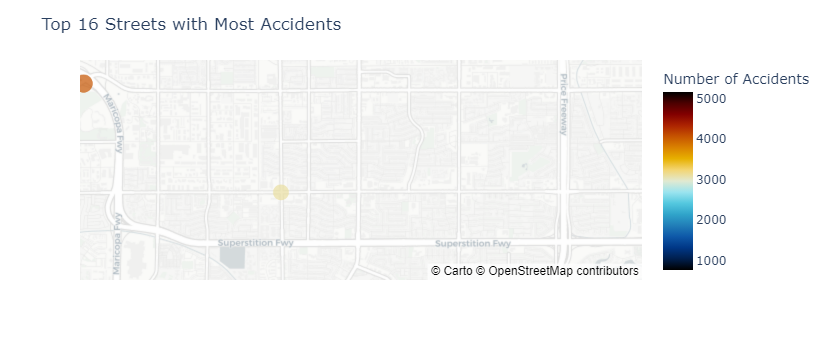

In [733]:
top_streets = accidents_by_street.head(16)
# מאחדים את הנתונים עם קואורדינטות X ו-Y
top_streets_coords = top_streets.merge(strike_df[['StreetName', 'Coordinate_X', 'Coordinate_Y']], on='StreetName', how='left').drop_duplicates(subset=['StreetName'])
# יוצרים מפה אינטראקטיבית
fig = px.scatter_mapbox(
    top_streets_coords,
    lat='Coordinate_Y',
    lon='Coordinate_X',
    hover_name='StreetName',
    hover_data={'Number of Accidents': True, 'Coordinate_X': False, 'Coordinate_Y': False},
    color='Number of Accidents',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size='Number of Accidents',
    size_max=15,
    zoom=12,
    mapbox_style='carto-positron')
# מציגים את המפה
fig.update_layout(title='Top 16 Streets with Most Accidents')
fig.show()

# <b id="section_2">  </b> <b style='color:#F05454'>2.  Insight number one </b> <b></b> 
<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

* **We proved Pareto: it can be seen by the barplot graph, scatterplot and by using the map, that there are the main streets in the city where the highest number of accidents occur, as described before. In addition, it can be seen that the 20 streets where the most accidents happened They actually make up about 80% of all the 522 existing streets, so it can be said that these streets require more attention.
We hypothesize that this can be overcome through enforcement by the security forces in the area so that accidents there are avoided**


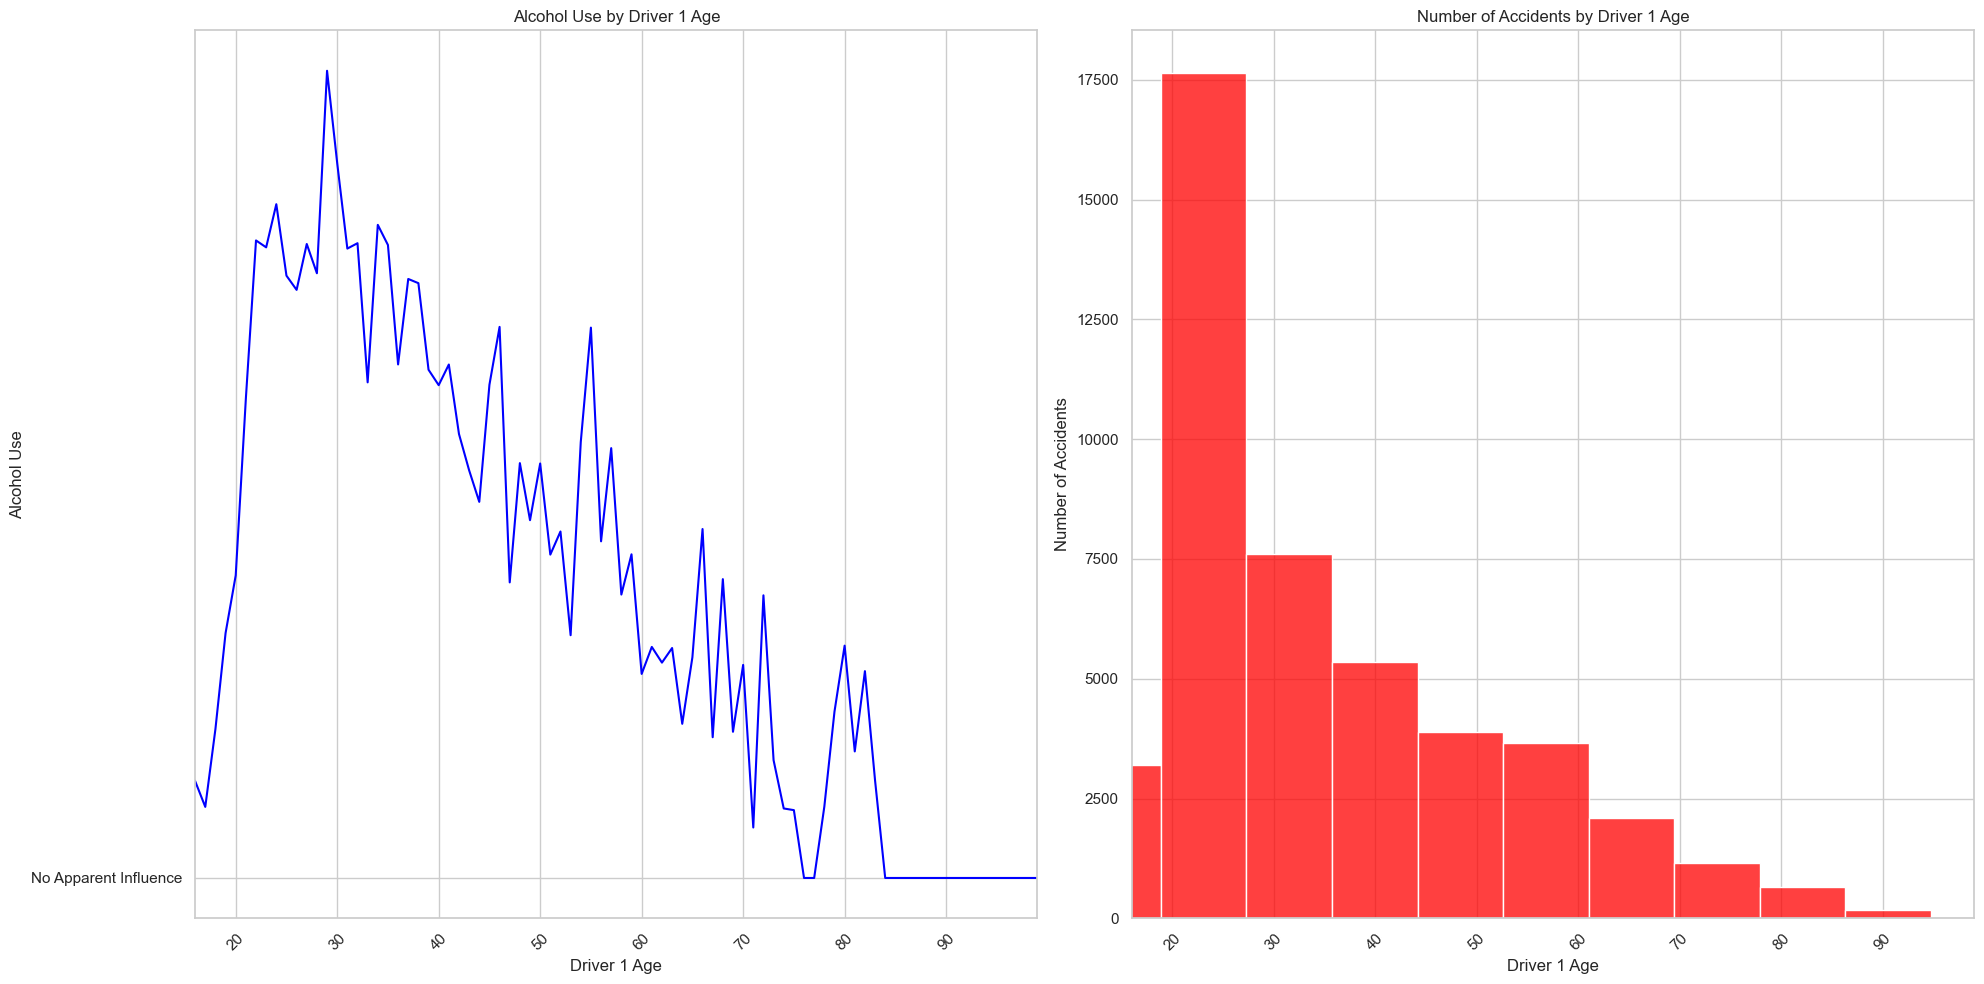

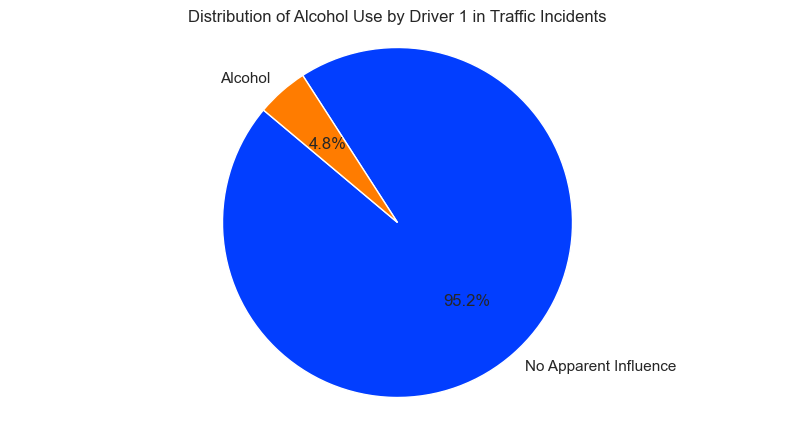

In [738]:
plt.figure(figsize=(20, 10))

# גרף השימוש באלכוהול לפי גיל הנהג
plt.subplot(1, 2, 1)
sns.lineplot(x='Age_Drv1', y='AlcoholUse_Drv1', data=strike_df, color='blue', errorbar=None)
plt.xlabel('Driver 1 Age')
plt.ylabel('Alcohol Use')
plt.title('Alcohol Use by Driver 1 Age')
plt.xticks(rotation=45)
plt.xlim(16, 99)

# גרף מספר התאונות לפי גיל הנהג
plt.subplot(1, 2, 2)
sns.histplot(x='Age_Drv1', data=strike_df, bins=30, color='red')
plt.xlabel('Driver 1 Age')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Driver 1 Age')
plt.xticks(rotation=45)
plt.xlim(16, 99)

plt.tight_layout()
plt.show()

# ספירת מספר הצורכים אלכוהול והלא צורכים עבור נהג 1
alcohol_use_drv1 = strike_df['AlcoholUse_Drv1'].value_counts()

# יצירת גרף עוגה
plt.figure(figsize=(10, 5))
plt.pie(alcohol_use_drv1, labels=alcohol_use_drv1.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright', len(alcohol_use_drv1)))
plt.title('Distribution of Alcohol Use by Driver 1 in Traffic Incidents')
plt.axis('equal')  # שמירה על עיגול
plt.show()


In [739]:
# סינון רק לנהגים בגילאי 20-30 שצרכו אלכוהול
alcohol_use_20_to_30 = strike_df[(strike_df['Age_Drv1'] >= 20) & (strike_df['Age_Drv1'] <= 30) & (strike_df['AlcoholUse_Drv1'] == 'Alcohol')]

# ספירת המספר
num_alcohol_users_20_to_30 = len(alcohol_use_20_to_30)

print(f"מספר הנהגים בגילאי 20-30 שצרכו אלכוהול הוא: {num_alcohol_users_20_to_30}")


מספר הנהגים בגילאי 20-30 שצרכו אלכוהול הוא: 1288


In [740]:
# סינון רק לנהגים שצרכו אלכוהול
alcohol_users = strike_df[strike_df['AlcoholUse_Drv1'] == 'Alcohol']

# ספירת המספר
num_alcohol_users = len(alcohol_users)

print(f"מספר הנהגים שצרכו אלכוהול הוא: {num_alcohol_users}")


מספר הנהגים שצרכו אלכוהול הוא: 2453


In [741]:
# חישוב האחוזים
percentage_alcohol_users_20_to_30 = (num_alcohol_users_20_to_30 / num_alcohol_users) * 100

print(f"האחוז של נהגים בגילאי 20-30 שצרכו אלכוהול מתוך כלל הנהגים שצרכו אלכוהול הוא: {percentage_alcohol_users_20_to_30:.2f}%")


האחוז של נהגים בגילאי 20-30 שצרכו אלכוהול מתוך כלל הנהגים שצרכו אלכוהול הוא: 52.51%


* **According to the pie graph, it can be seen that although it shows that the percentage of alcohol consumption is very small, it can still be seen by Lineplot and Barplot that there is a proven effect of alcohol use in the 20-30 age group which leads to a higher amount of accidents.** 

# <b id="section_3">  </b> <b style='color:#F05454'>3.  Insight number two </b> <b></b> 
<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

* **Analyzing the graphs of alcohol use according to the age of the first driver shows that young drivers (aged 16-30) tend to use alcohol more than older drivers. It can also be seen that older drivers (50+) use less alcohol compared to younger drivers. This conclusion indicates that there is a need for education and increased enforcement of drunk driving among young populations in order to reduce the number of accidents caused by the use of alcohol.** 

* **In addition, it can be seen from the pie graph that the percentage of alcohol consumption is significantly lower than that of no alcohol use and indeed the number of accidents for those who consumed alcohol is still very high therefore we have proven a direct link between alcohol and accidents!**

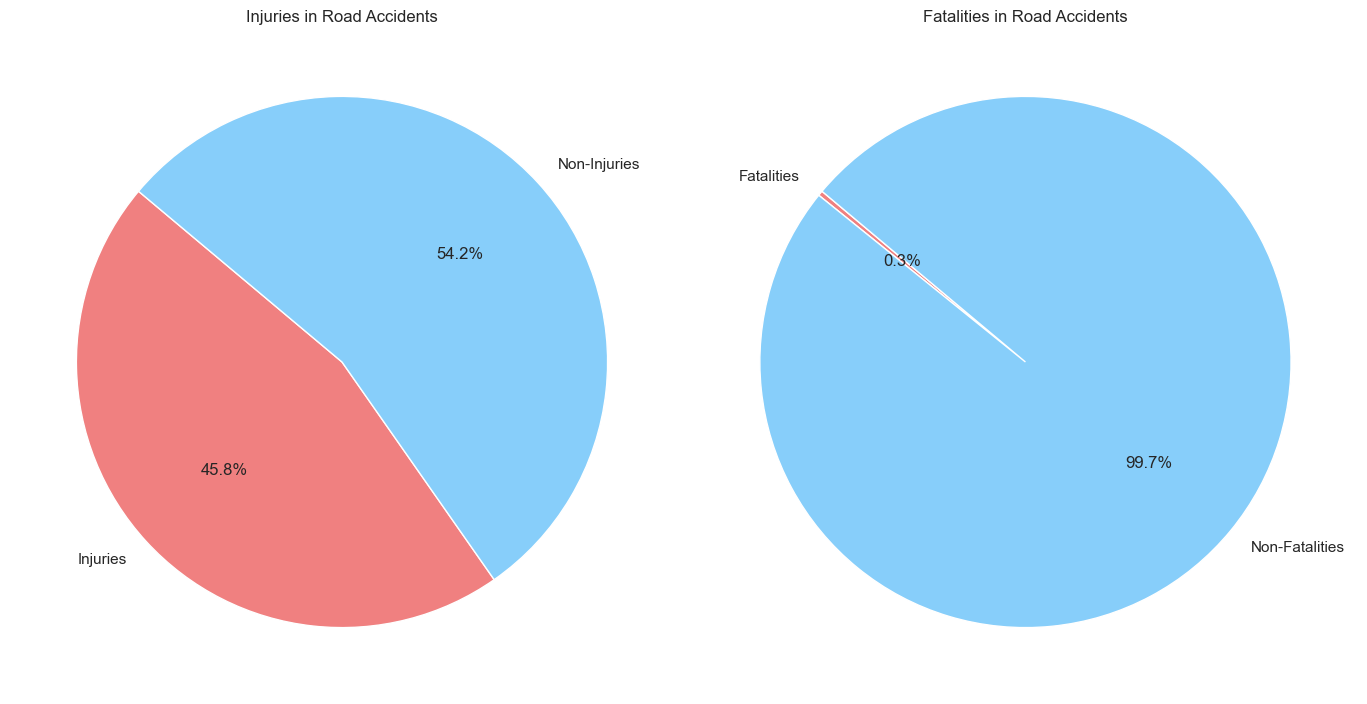

In [742]:
# יצירת גרפים עוגה צמודים עם צבעים שונים
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
colors = ['lightcoral', 'lightskyblue']

# גרף ראשון - מספר הנפגעים בתאונות דרכים
axs[0].pie([total_injuries, len(strike_df) - total_injuries], labels=['Injuries', 'Non-Injuries'], autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title('Injuries in Road Accidents')

# גרף שני - מספר הנפטרים בתאונות דרכים
axs[1].pie([total_fatalities, len(strike_df) - total_fatalities], labels=['Fatalities', 'Non-Fatalities'], autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Fatalities in Road Accidents')

# הצגת הגרפים
plt.tight_layout()
plt.show()


* **You can see in the pie graphs that 0.3% of all drivers who have had traffic accidents, they die. And, of all the drivers who had accidents, almost half of them were injured.**

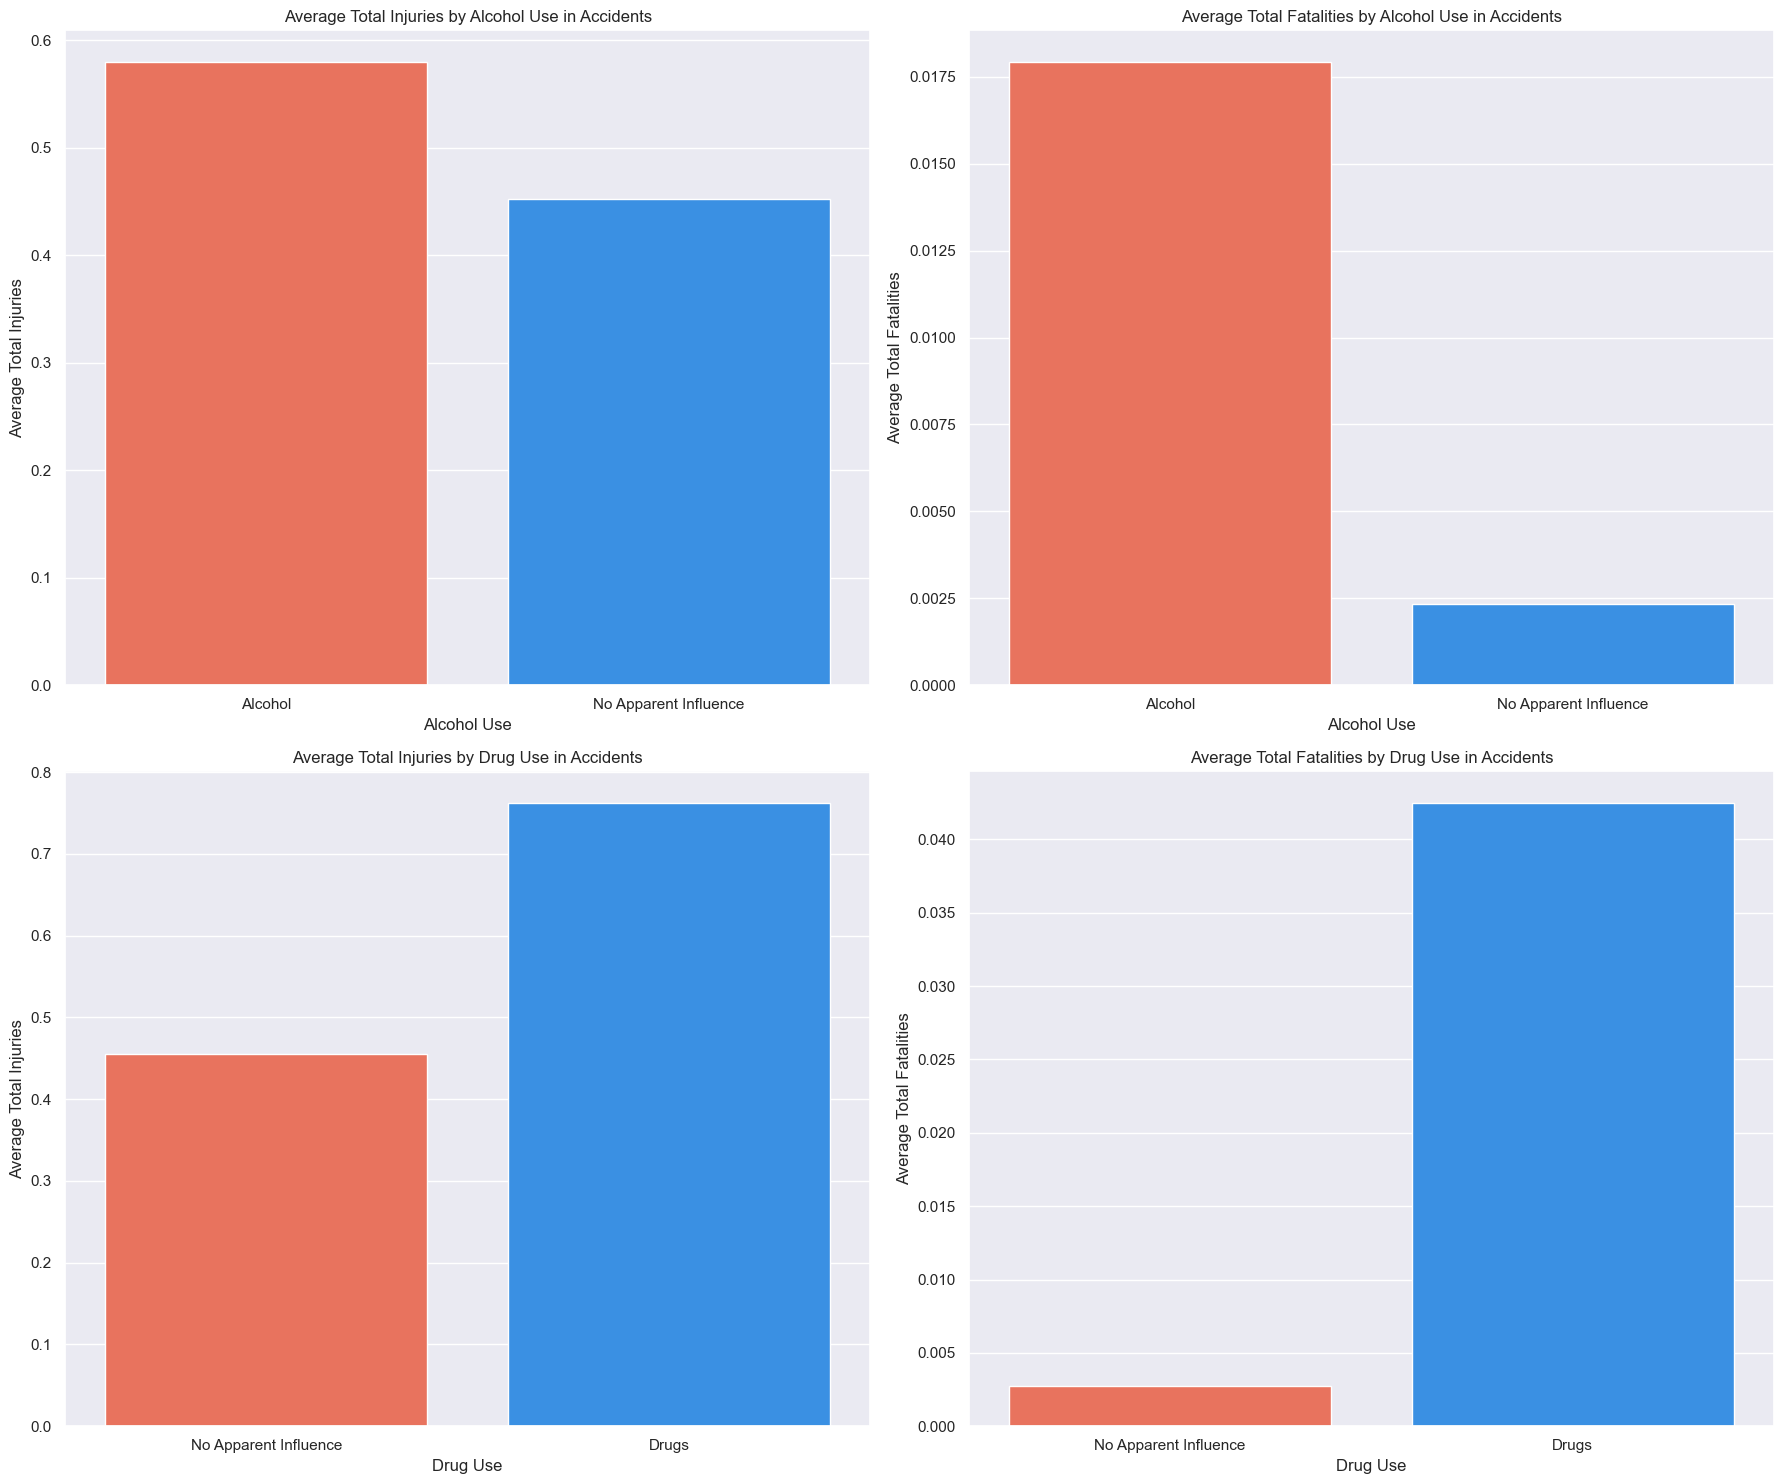

In [676]:
fig, axs = plt.subplots(2, 2, figsize=(18, 15))

#נעזרנו בצ'אט גי טי פי למציאת פלטת צבעים
colors = ['#FF6347', '#1E90FF', '#32CD32', '#FFD700', '#9370DB']

# גרף ראשון - כמות פצועים לפי צריכת אלכוהול
sns.barplot(x='AlcoholUse_Drv1', y='Totalinjuries', data=strike_df, ax=axs[0, 0], palette=colors, errorbar=None)
axs[0, 0].set_xlabel('Alcohol Use')
axs[0, 0].set_ylabel('Average Total Injuries')
axs[0, 0].set_title('Average Total Injuries by Alcohol Use in Accidents')
# גרף שני - כמות מתים לפי צריכת אלכוהול
sns.barplot(x='AlcoholUse_Drv1', y='Totalfatalities', data=strike_df, ax=axs[0, 1], palette=colors, errorbar=None)
axs[0, 1].set_xlabel('Alcohol Use')
axs[0, 1].set_ylabel('Average Total Fatalities')
axs[0, 1].set_title('Average Total Fatalities by Alcohol Use in Accidents')
# גרף שלישי - כמות פצועים לפי צריכת סמים
sns.barplot(x='DrugUse_Drv1', y='Totalinjuries', data=strike_df, ax=axs[1, 0], palette=colors, errorbar=None)
axs[1, 0].set_xlabel('Drug Use')
axs[1, 0].set_ylabel('Average Total Injuries')
axs[1, 0].set_title('Average Total Injuries by Drug Use in Accidents')
# גרף רביעי - כמות מתים לפי צריכת סמים
sns.barplot(x='DrugUse_Drv1', y='Totalfatalities', data=strike_df, ax=axs[1, 1], palette=colors, errorbar=None)
axs[1, 1].set_xlabel('Drug Use')
axs[1, 1].set_ylabel('Average Total Fatalities')
axs[1, 1].set_title('Average Total Fatalities by Drug Use in Accidents')
plt.tight_layout()
plt.show()


* **It can be seen that when you consume alcohol\drugs and drive, then the number of people killed is much more than the number of people killed who did not drink alcohol.**

In [743]:
# ממיר את העמודה לסוג תאריך ושעה
strike_df['DateTime'] = pd.to_datetime(strike_df['DateTime'])

#מחלץ את החודש מהעמודה
strike_df['Month'] = strike_df['DateTime'].dt.month

#מפת חודשים לעונות
season_map = {11: 'Winter', 12: 'Winter', 1: 'Winter',
              2: 'Winter', 3: 'Spring', 4: 'Spring',
              5: 'Summer', 6: 'Summer', 7: 'Summer',
              8: 'Summer', 9: 'Fall', 10: 'Fall'}
strike_df['Season'] = strike_df['Month'].map(season_map)

strike_df.head()


,Coordinate_X,Coordinate_Y,NumOfAccident,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Month,Season
0,-111.95221,33.42191,1,2598369,2012-01-01 07:25:00+00:00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,1,Winter
1,-111.93769,33.42319,2,2593420,2012-01-01 11:45:00+00:00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Winter
2,-111.89196,33.41842,3,2588493,2012-01-01 18:07:00+00:00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,1,Winter
3,-111.94791,33.41779,4,2584449,2012-01-02 00:03:00+00:00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,1,Winter
4,-111.92847,33.34956,5,2592211,2012-01-02 00:12:00+00:00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,1,Winter


In [744]:
print(strike_df['Season'])

0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
51402    Spring
51403    Spring
51404    Spring
51405    Spring
51406    Spring
Name: Season, Length: 51407, dtype: object


In [745]:
season_accidents = strike_df.groupby('Season')['NumOfAccident'].count().reset_index()
print(season_accidents)


   Season  NumOfAccident
0    Fall           9404
1  Spring           8928
2  Summer          14983
3  Winter          18092


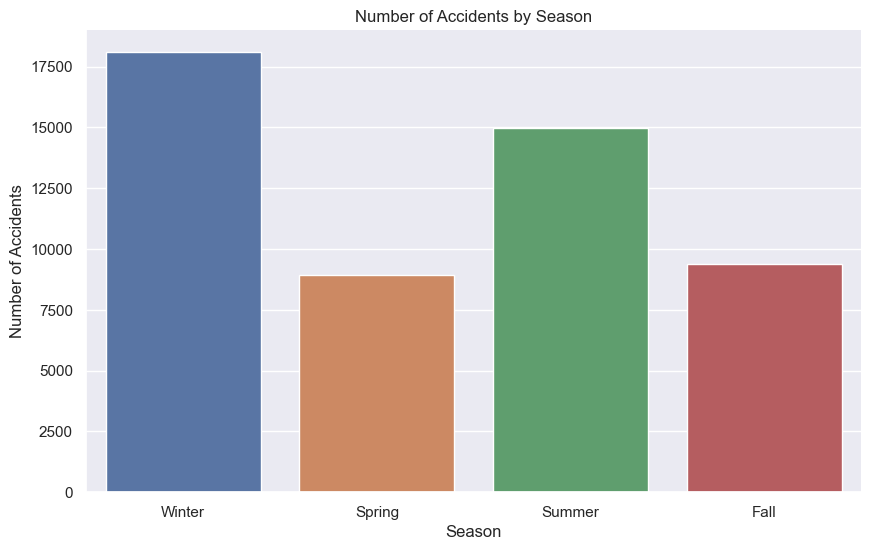

In [746]:
sns.set(rc={'figure.figsize':(10, 6)})
bar_plot = sns.barplot(x='Season', y='NumOfAccident', data=season_accidents, order=['Winter', 'Spring', 'Summer', 'Fall'])
bar_plot.set_xlabel('Season')
bar_plot.set_ylabel('Number of Accidents')
bar_plot.set_title('Number of Accidents by Season')
sns.despine()

* **We have added some data in order to show you in which season many accidents occurred. We think it may interest you that most accidents happen in the winter even though Tampe Arizona does not rain in the winter! But rather in the summer!**

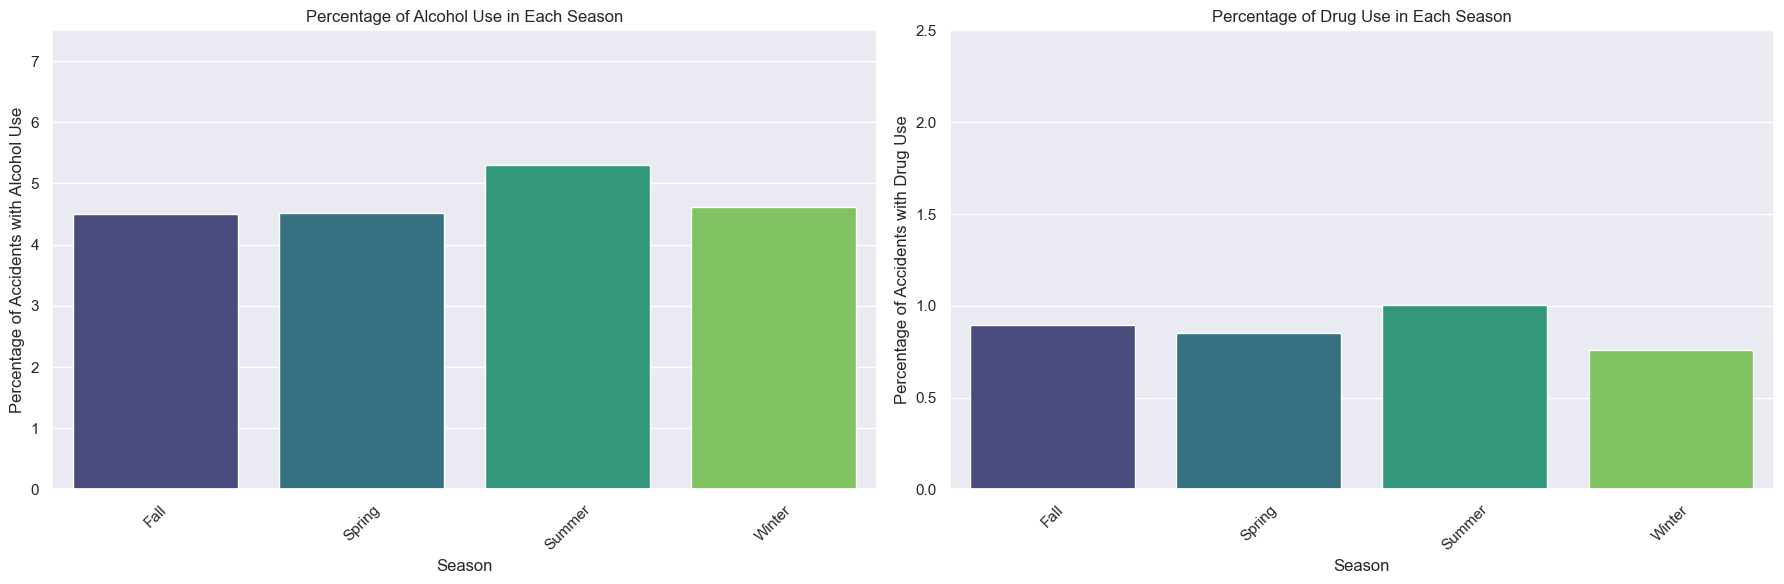

In [681]:
#חישובים ליצירת הגרפים:
# חישוב התאונות עם צריכת אלכוהול בכל עונה
alcohol_season_total = strike_df.groupby('Season')['AlcoholUse_Drv1'].count().reset_index()
# חישוב התאונות בהן צורף אלכוהול בכל עונה
alcohol_season_alcohol = strike_df[strike_df['AlcoholUse_Drv1'] == 'Alcohol'].groupby('Season')['AlcoholUse_Drv1'].count().reset_index()
# שילוב שני הטבלאות לקבלת אחוזי התאונות עם צריכת אלכוהול בכל עונה
alcohol_season_merged = alcohol_season_total.merge(alcohol_season_alcohol, on='Season', how='left')
alcohol_season_merged['AlcoholPercentage'] = (alcohol_season_merged['AlcoholUse_Drv1_y'] / alcohol_season_merged['AlcoholUse_Drv1_x']) * 100
# חישוב התאונות עם צריכת סמים בכל עונה
drug_season_total = strike_df.groupby('Season')['DrugUse_Drv1'].count().reset_index()
# חישוב התאונות בהן צורף סמים בכל עונה
drug_season_drug = strike_df[strike_df['DrugUse_Drv1'] == 'Drugs'].groupby('Season')['DrugUse_Drv1'].count().reset_index()
# שילוב שני הטבלאות לקבלת אחוזי התאונות עם צריכת סמים בכל עונה
drug_season_merged = drug_season_total.merge(drug_season_drug, on='Season', how='left')
drug_season_merged['DrugPercentage'] = (drug_season_merged['DrugUse_Drv1_y'] / drug_season_merged['DrugUse_Drv1_x']) * 100


# יצירת גרף צריכת אלכוהול בכל עונה
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Season', y='AlcoholPercentage', data=alcohol_season_merged, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Percentage of Accidents with Alcohol Use')
plt.title('Percentage of Alcohol Use in Each Season')
plt.ylim(0, 7.5)
plt.xticks(rotation=45)
# יצירת גרף צריכת סמים בכל עונה
plt.subplot(1, 2, 2)
sns.barplot(x='Season', y='DrugPercentage', data=drug_season_merged, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Percentage of Accidents with Drug Use')
plt.title('Percentage of Drug Use in Each Season')
plt.ylim(0, 2.5)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# <b id="section_4">  </b> <b style='color:#F05454'>3.  Insight number three: </b> <b></b> 
<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

* **We have proven that although most accidents take place in the winter, most of the accidents that occurred due to alcohol and drugs occurred in the summer! That is, there is a close connection between the consumption of alcohol or drugs in the summer and the number of accidents that occur as a result.**